# Kod do parsowania logów i rysowania wykresów

In [117]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Function to parse execution times from the log file
def parse_execution_times(file_path):
    stage_times = []
    
    # Regex pattern to match stage and execution time lines
    stage_pattern = re.compile(r"\[OK in (\d+\.\d+)s\]")
    
    with open(file_path, 'r') as file:
        for line in file:
            # Match and extract stage number and execution time
            match = stage_pattern.search(line)
            if match:
                execution_time = float(match.group(1))
                stage_times.append(execution_time)

    return stage_times

In [118]:
file_paths = [
    "./one_executor_run.txt", 
    "./two_executors_run.txt", 
    "./five_executors_run.txt"
]

In [119]:
execution_times_1 = parse_execution_times(file_paths[0])
execution_times_2 = parse_execution_times(file_paths[1])
execution_times_3 = parse_execution_times(file_paths[2])

In [120]:
import pandas as pd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

DF1 = pd.DataFrame({'Stage': [str(x) for x in range(1,len(execution_times_1)+1)], "Execution Time (s)": execution_times_1})
DF2 = pd.DataFrame({'Stage': [str(x) for x in range(1,len(execution_times_2)+1)], "Execution Time (s)": execution_times_2})
DF3 = pd.DataFrame({'Stage': [str(x) for x in range(1,len(execution_times_3)+1)], "Execution Time (s)": execution_times_3})



In [121]:
DF = pd.concat([DF1, DF2, DF3])
series_1 = ['1']*len(DF1)
series_2 = ['2']*len(DF2)
series_3 = ['5']*len(DF3)

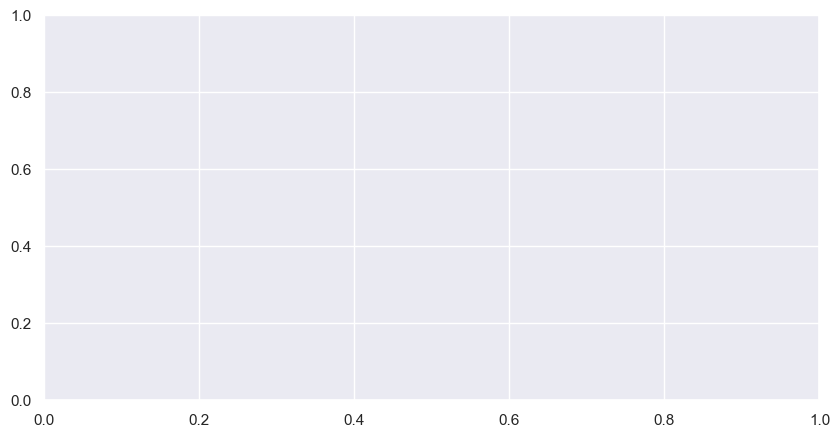

In [122]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))

In [123]:
# setting the figure size
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width,height)})

<Axes: xlabel='Stage', ylabel='Execution Time (s)'>

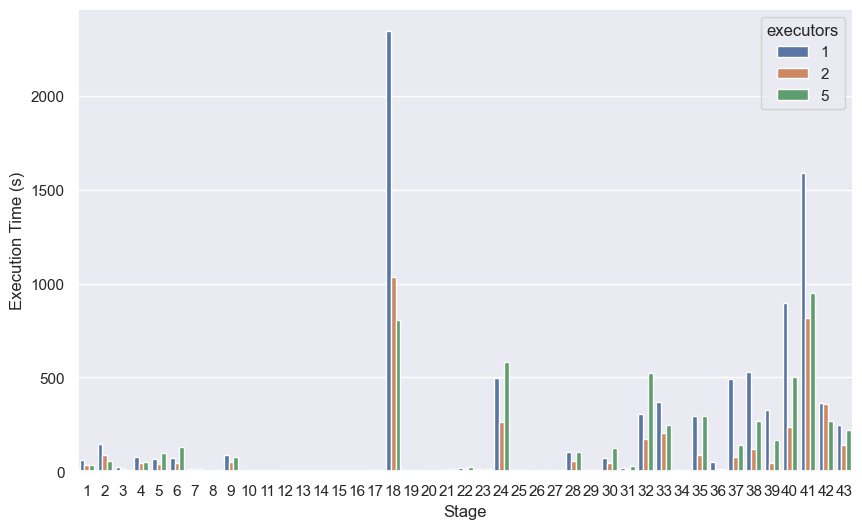

In [124]:
df_num = list(chain(series_1, series_2, series_3))
DF['executors'] = df_num

sns.barplot(data = DF, x='Stage', y='Execution Time (s)', hue='executors')
#plt.show()